In [95]:
!pip install powerlaw

In [96]:
import pandas as pd
import networkx as nx
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
sns.set_theme()

In [98]:
df = pd.read_csv('dados.csv', encoding='latin-1',
                 dtype={'autor': str, 'nome': str, 'leitores': str})

In [99]:
G = nx.Graph()

In [100]:
for index, row in df.iterrows():
    readers = row['leitores'].split(';')
    node = row['nome']

    G.add_node(node)

    for other_row in df.iloc[index+1:].iterrows():
        if other_row[0] != row.name:
            other_readers = other_row[1]['leitores'].split(';')
            common_readers = set(readers) & set(other_readers)
            if common_readers:
                edge_weight = len(common_readers)

                G.add_edge(row['nome'], other_row[1]
                           ['nome'], weight=edge_weight)

edge_list = [(u, v, G[u][v]['weight']) for u, v in G.edges]

edges_df = pd.DataFrame(edge_list, columns=['Source', 'Target', 'Weight'])

edges_df.to_csv('arestas.csv', index=False)

In [101]:
bc = nx.betweenness_centrality(G)

Text(0, 0.5, 'betweenness centrality')

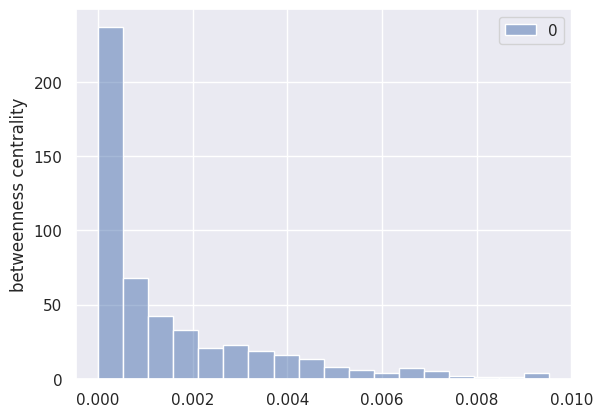

In [102]:
sns.histplot(bc.values())
plt.ylabel('betweenness centrality')

In [103]:
'livros mais centrais', sorted(bc.items(), key=lambda item: item[1], reverse=True)[:15]

('livros mais centrais',
 [('O 18 Brumï¿½rio de Luï¿½s Bonaparte', 0.009526987478555229),
  ('Casa-Grande & Senzala', 0.009486540640570779),
  ('Leviatï¿½', 0.009181083889649944),
  ('Os EUA e a Nova Ordem Mundial ', 0.009155874648598345),
  ('Problemas de Gï¿½nero', 0.008627707795098081),
  ('A Ditadura Escancarada', 0.008139526200848719),
  ('Os Bestializados', 0.0077280897257646),
  ('Por Que Gritamos Golpe?', 0.007483579171009289),
  ('Livro negro do comunismo', 0.007403315866406707),
  ('O ï¿½dio Como Polï¿½tica', 0.007401137461391676),
  ('Origens do Totalitarismo', 0.0072843825664755495),
  ('Os Donos do Poder: Formaï¿½ï¿½o do Patronato Polï¿½tico Brasileiro',
   0.007038559035645895),
  ('O Capital', 0.007013581390121642),
  ('A Polï¿½tica', 0.006767023409735949),
  ('Cidadania no Brasil', 0.006695285423219394)])

In [104]:
pagerank = nx.pagerank(G)

Text(0.5, 0, 'livros')

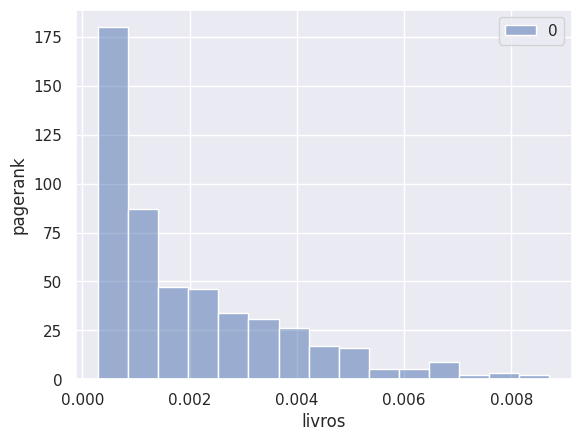

In [105]:
sns.histplot(pagerank.values())
plt.ylabel('pagerank')
plt.xlabel('livros')

In [106]:
'pagerank', sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[:15]

('pagerank',
 [('O Jardim das Afliï¿½ï¿½es', 0.008701862526357459),
  ('A Nova Era e a Revoluï¿½ï¿½o Cultural', 0.008651852302947618),
  ('Imbecil coletivo', 0.008104623471149399),
  ('Corrupï¿½ï¿½o da inteligï¿½ncia', 0.007796055364020744),
  ('Maquiavel Pedagogo', 0.00772334084364508),
  ('Os EUA e a Nova Ordem Mundial ', 0.007179763650546787),
  ('A Vida na Sarjeta', 0.007021148779161195),
  ('Marxismo desmascarado', 0.007003779165376034),
  ('Invasão vertical dos bárbaros', 0.006973894796848914),
  ('O caminho da servidï¿½o', 0.006965314066552935),
  ('A Mentalidade Anticapitalista', 0.006925932741788994),
  ('Introduï¿½ï¿½o ï¿½ Nova Ordem Mundial', 0.006853110687089847),
  ('Democracia, o Deus que Falhou', 0.006752013684281598),
  ('Como Ser Um Conservador', 0.006722376642663203),
  ('Maquiavel, ou a Confusï¿½o Demonï¿½aca ', 0.006632068987211243)])

In [107]:
degrees = [d for _, d in G.degree()]

Text(0, 0.5, 'grau')

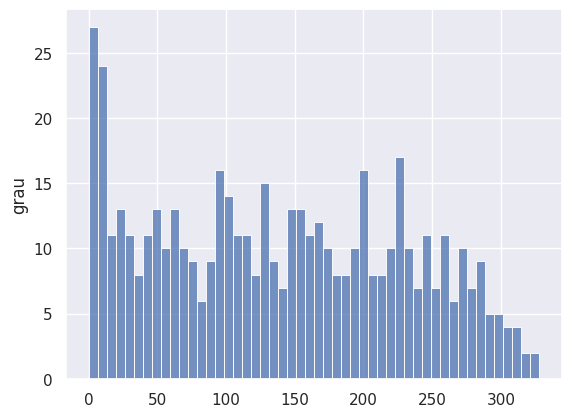

In [108]:
sns.histplot(degrees, bins=50)
plt.ylabel('grau')

In [109]:
'probabilidade de ser uma power law', powerlaw.Fit(degrees).D

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


('probabilidade de ser uma power law', 0.11039823452989417)

In [110]:
average_degree = sum(dict(G.degree()).values()) / len(G)
'grau médio do grafo:', average_degree

('grau médio do grafo:', 138.81176470588235)

In [124]:
components = list(nx.connected_components(G))
[len(comp) for comp in components]

[503, 1, 1, 1, 1, 1, 1, 1]

Text(0, 0.5, 'número de componentes')

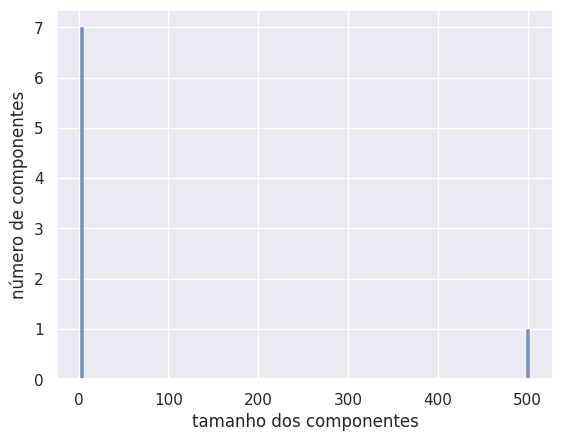

In [112]:
sns.histplot([len(comp) for comp in components], bins=100)
plt.xlabel('tamanho dos componentes')
plt.ylabel('número de componentes')

In [113]:
single_component_titles = [list(i)[0] for i in components[1:]]
big_component = G.subgraph(components[0])

In [114]:
num_readers = {title: len(str(df.loc[df['nome'] == title]['leitores']).split(';')) for title in single_component_titles}

In [115]:
num_readers

{'Viagem ao cais de Wigan': 2,
 'O livro essencial das bruxas': 2,
 'O Reflexo atual da subjugaï¿½ï¿½o feminina': 1,
 'Lenin y Hitler': 1,
 'New Lies For Old': 1,
 'O Livro Negro de Cuba': 5,
 'Olavo de Carvalho': 1}

In [116]:
clustering = nx.clustering(G)

Text(0, 0.5, 'coeficiente de clusterização')

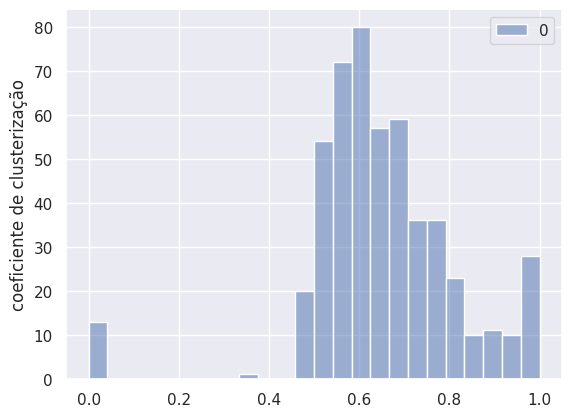

In [117]:
sns.histplot(clustering.values())
plt.ylabel('coeficiente de clusterização')

In [118]:
global_clustering = nx.transitivity(G)

In [119]:
global_clustering

0.5723294969090817

In [120]:
avg_dist = nx.average_shortest_path_length(big_component)
avg_dist

1.7644253997924801

In [121]:
pearson_coef = nx.degree_pearson_correlation_coefficient(G, weight='weight')
pearson_coef

-0.07214103958271587

In [122]:
assortativity = nx.degree_assortativity_coefficient(G)
assortativity

-0.09754578778195466